<a href="https://colab.research.google.com/github/sap156/infinityskillshub/blob/main/PII_and_Imbalanced_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generative AI for Data Professionals
# Data Generation and Augmentation — Part 4
# Handling PII and Imbalanced Data

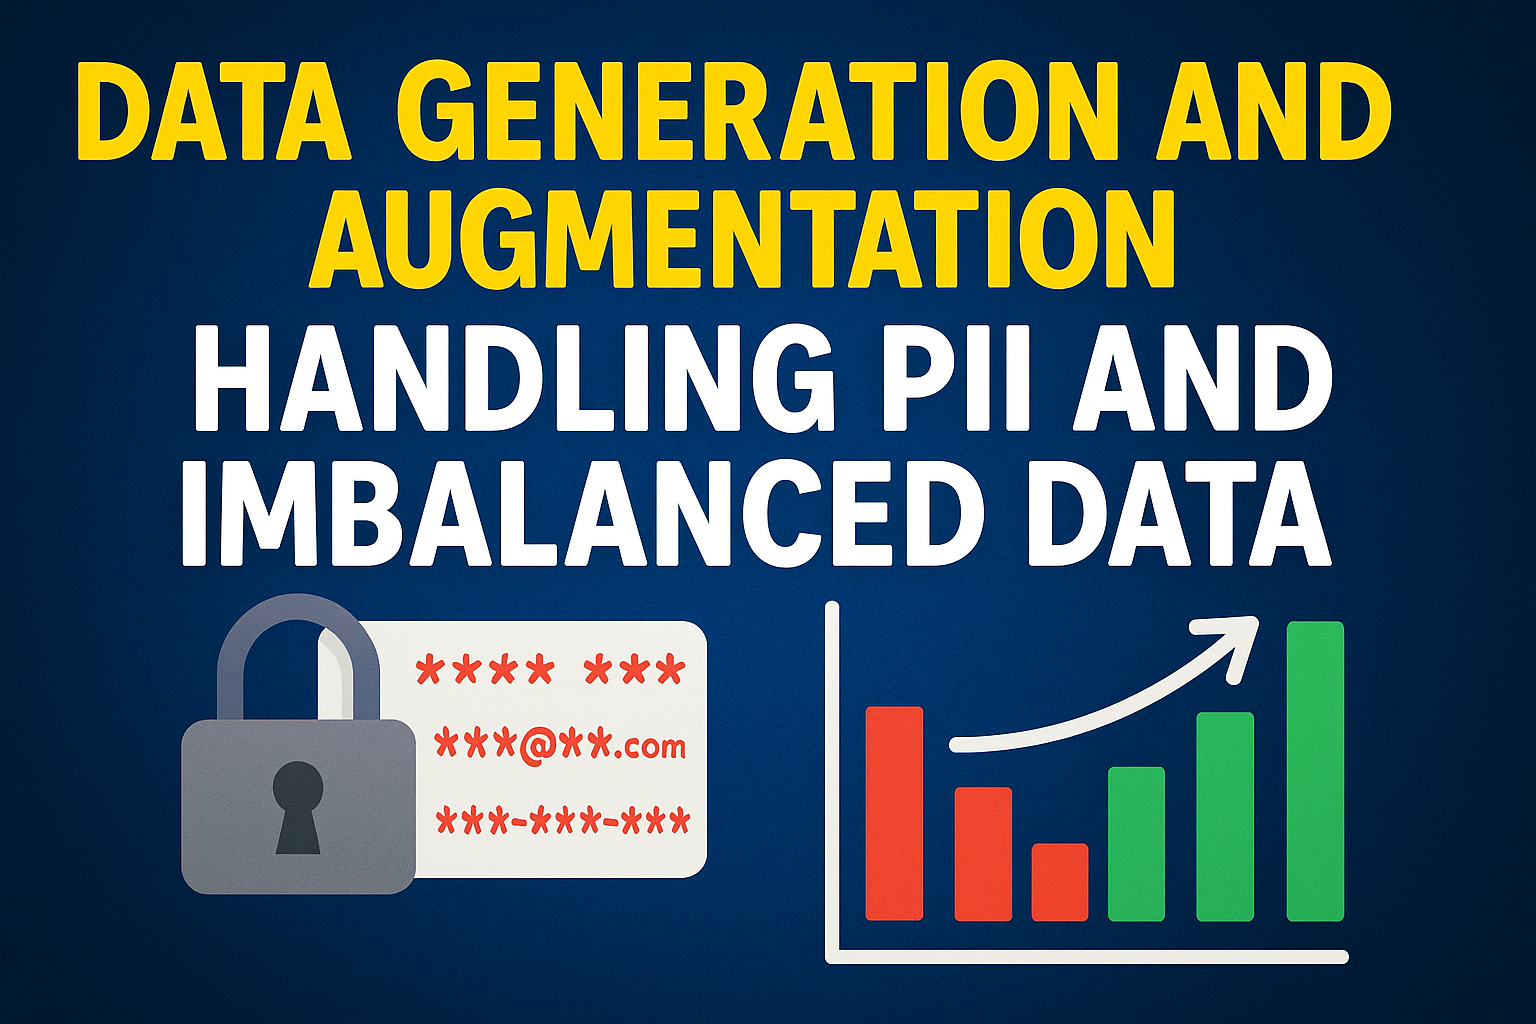

# 🔒 PII Handling and Imbalanced Data Solutions

**Handling Personally Identifiable Information (PII) is a critical task for data engineers,
particularly in industries such as banking, healthcare, and government. Ensuring that
datasets do not expose sensitive information is essential for compliance, security,
and ethical data handling.**

Traditional AI and rule-based methods have limitations, but **Generative AI** offers
enhanced flexibility, allowing data engineers to:
- **Mask PII while preserving useful features** (e.g., keeping email domains but masking usernames)
- **Generate synthetic data that mimics real data without revealing actual PII**
- **Process text data to redact PII dynamically**

Another significant challenge is handling **imbalanced datasets** where one category
significantly outweighs another (e.g., fraud detection, medical diagnoses).
Generative AI helps balance these datasets by generating synthetic observations.

**Learning Objectives:**
- ✅ Understand PII detection and masking with AI
- ✅ Create synthetic data while preserving distributions
- ✅ Handle imbalanced datasets with intelligent augmentation
- ✅ Apply selective masking for complex scenarios
- ✅ Master text-based PII redaction techniques

In [3]:
# =====================================================
# 🛠️ SETUP AND IMPORTS
# =====================================================

from openai import OpenAI
import pandas as pd
import json
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
from google.colab import userdata


api_key=userdata.get('OPENAI_API_KEY')

# Set up our AI client securely
client = OpenAI(api_key=api_key)

def clean(dict_variable):
    return next(iter(dict_variable.values()))

print("✅ Environment ready for time series generation!")

✅ Environment ready for time series generation!


# =====================================================
# 👤 CREATING SAMPLE DATASET WITH PII
# =====================================================


## Creating a Sample Dataset with PII

To demonstrate PII handling, let's first create a simple DataFrame containing PII
such as names, emails, and phone numbers, along with age and salary fields
that should remain unchanged.

In [ ]:
# 1. Creating a Sample Dataset with PII
data = {
    'Name': ['John Doe', 'Jane Smith', 'Bob Johnson'],
    'Email': ['john@gmail.com', 'jane@yahoo.com', 'bob@aol.com'],
    'Phone': ['123-456-7890', '234-567-8901', '345-678-9012'],
    'Age': [30, 25, 45],
    'Salary': [50000, 60000, 75000]
}

df = pd.DataFrame(data)
print("📊 Original Dataset with PII:")
print(df)


🎯 **The Challenge:** This dataset contains sensitive PII (names, emails, phone numbers)
that needs protection, while preserving valuable business data (age, salary) for analysis.
"""

# =====================================================
# 🔒 PII MASKING USING GENERATIVE AI
# =====================================================


## PII Masking Using Generative AI

We can use GPT-4o-mini to detect and mask PII while keeping useful non-sensitive
information, such as age and salary.

In [ ]:
# 2. PII Masking Using Generative AI
prompt = f"""Mask all the following PII data. Keep the Age and Salary as is. Output in JSON form. Original data: {df.to_json(orient='records')}"""

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": prompt}],
    response_format={"type": "json_object"}
)

masked_data = json.loads(response.choices[0].message.content)
masked_df = pd.DataFrame(clean(masked_data))

print("🔒 Masked Dataset:")
print(masked_df)

**Why Not Just Remove PII Columns?**

You might wonder: *Why not simply drop the name, email, and phone columns?*

- In **real-world scenarios**, PII may be **embedded** in other columns, such as a "Name & Profession" field
- Some columns may contain both **PII and valuable features**, such as **email domains** used for customer segmentation
- **Traditional masking methods** often require manual intervention, whereas Generative AI can dynamically **detect and redact** sensitive data

🎯 **Key Advantage:** AI understands context and can selectively mask only the sensitive parts.



# =====================================================
# 🎯 SELECTIVE MASKING: RETAINING IMPORTANT FEATURES
# =====================================================


## Selective Masking: Retaining Important Features

Generative AI allows us to mask only PII while retaining useful information,
such as email domains and professions.

In [ ]:
# 3. Selective Masking: Retaining Important Features
prompt_selective = f"""Mask the PII fields in the following data keeping the last name and email @domains intact. Output in JSON form.
Original data:
{df.to_json(orient='records')}
"""

response_selective = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": prompt_selective}],
    response_format={"type": "json_object"}
)

selective_masked_data = json.loads(response_selective.choices[0].message.content)
selective_masked_df = pd.DataFrame(clean(selective_masked_data))

print("🎯 Selectively Masked Dataset (Preserving Email Domains):")
print(selective_masked_df)


🎯 **Business Value:** Email domains can be crucial for customer segmentation
(gmail.com vs corporate domains), market analysis, and campaign targeting
while still protecting individual identity.

# =====================================================
# 🧬 GENERATING SYNTHETIC DATA WHILE PRESERVING DISTRIBUTIONS
# =====================================================


## Generating Synthetic Data While Preserving Distributions

Instead of masking PII, Generative AI can also replace PII with synthetic values
while maintaining similar data distributions.

In [ ]:
# 4. Generating Synthetic Data While Preserving Distributions
prompt_synthetic = f"""Generate synthetic data similar to the following, but with different PII. Keep the Age and Salary distributions similar. Output in JSON form.
Original data:
{df.to_json(orient='records')}
"""

response_synthetic = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": prompt_synthetic}],
    response_format={"type": "json_object"}
)

synthetic_data = json.loads(response_synthetic.choices[0].message.content)
synthetic_df = pd.DataFrame(clean(synthetic_data))

print("🧬 Synthetic Dataset:")
print(synthetic_df)

**Key Benefits of Synthetic Data Generation:**

- **Maintains statistical similarity** for analysis while anonymizing PII
- **Creates internally consistent fake records** for development/testing  
- **Avoids regulatory risks** by ensuring no real PII is exposed
- **Enables data sharing** across teams without privacy concerns

🎯 **Perfect for:** Development environments, testing, demos, and cross-team collaboration.

# =====================================================
# 📝 PII MASKING IN TEXT DATA
# =====================================================


## PII Masking in Text Data (e.g., Customer Complaints)

Beyond structured datasets, Generative AI can also scrub PII from unstructured text,
such as customer complaints.

In [ ]:
# 5. PII Masking in Text Data (e.g., Customer Complaints)
pii_text = 'My name is Abhinav Parvathaneni and I live in Texas, USA and I was having trouble accessing my bank account (account ID: PL6P12345). Could you please help me?'

print("📝 Original Text with PII:\n")
print(pii_text)

response_text = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": "Remove any PII from the following text, replace it with *: {}".format(pii_text)}]
)

print("\n🔒 Text with PII Masked:\n")
print(response_text.choices[0].message.content)

In [ ]:
# Selective Redaction Example
print("\n🎯 Selective Redaction (Keeping Account IDs):\n")
prompt_selective_text = "Remove any PII from the following text except for account IDs: {}".format(pii_text)

response_selective_text = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": prompt_selective_text}]
)

print(response_selective_text.choices[0].message.content)

**Selective Redaction Benefits:**

Traditional PII removal methods may over-mask useful data. With **Generative AI**,
we can specify **what to keep**:

- **Important identifiers** (e.g., transaction IDs, account numbers) remain untouched
- **Personal details** (names, addresses) are removed
- **Business context** is preserved for analysis

🎯 **Use Cases:** Customer support analysis, complaint categorization,
fraud investigation (keeping case IDs but removing personal details).

# =====================================================
# ⚖️ BALANCING IMBALANCED DATASETS
# =====================================================


## Balancing Imbalanced Datasets

An **imbalanced dataset** occurs when certain categories are significantly
underrepresented, making it difficult for models to learn effectively.
Generative AI can generate **synthetic samples** to balance such datasets.

**Example: Balancing Positive and Negative Product Reviews**

In [4]:
# Create an unbalanced dataset of product reviews
positive_reviews = [
    "This product is amazing! I love it!",
    "Great quality and fast shipping.",
    "Exceeded my expectations. Highly recommended!",
    "Best purchase I've made in years.",
    "Fantastic product, will buy again."
]

negative_reviews = [
    "Disappointed with the quality."
]

reviews = positive_reviews + negative_reviews
labels = [1] * len(positive_reviews) + [0] * len(negative_reviews)

df_reviews = pd.DataFrame({'review': reviews, 'sentiment': labels})

print("📊 Original Imbalanced Dataset:")
print(df_reviews)
print(f"\n📈 Class Distribution:")
print(df_reviews['sentiment'].value_counts())

📊 Original Imbalanced Dataset:
                                          review  sentiment
0            This product is amazing! I love it!          1
1               Great quality and fast shipping.          1
2  Exceeded my expectations. Highly recommended!          1
3              Best purchase I've made in years.          1
4             Fantastic product, will buy again.          1
5                 Disappointed with the quality.          0

📈 Class Distribution:
sentiment
1    5
0    1
Name: count, dtype: int64


([<matplotlib.axis.XTick at 0x7d7d07286010>,
 [Text(1, 0, 'Negative'), Text(0, 0, 'Positive')])

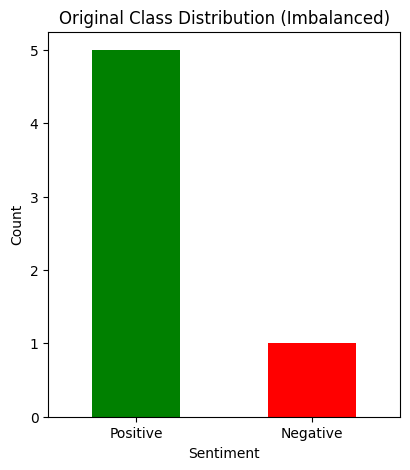

In [6]:
# Visualize imbalance
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df_reviews['sentiment'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Original Class Distribution (Imbalanced)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([1, 0], ['Negative', 'Positive'], rotation=0)


In [8]:
# Function to generate negative reviews
def generate_negative_review():
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "system", "content": "You are a helpful assistant that generates product reviews."},
            {"role": "user", "content": "Generate a negative product review similar to these negative reviews: {}. Output in JSON form.".format(negative_reviews)}
        ],
        response_format={"type": "json_object"}
    )
    return clean(json.loads(response.choices[0].message.content))

# Generate additional negative reviews
num_to_generate = len(positive_reviews) - len(negative_reviews)
print(f"\n🎲 Generating {num_to_generate} additional negative reviews...")

new_negative_reviews = [generate_negative_review() for _ in range(num_to_generate)]

print("📝 Sample Generated Negative Reviews:")
for i, review in enumerate(new_negative_reviews[:3]):
    print(f"{i+1}. {review}")

    # Add new negative reviews to the dataset
new_data = pd.DataFrame({'review': new_negative_reviews, 'sentiment': [0] * len(new_negative_reviews)})
df_balanced = pd.concat([df_reviews, new_data], ignore_index=True)

print(f"\n⚖️ Balanced Dataset:")
print(df_balanced)
print(f"\n📈 New Class Distribution:")
print(df_balanced['sentiment'].value_counts())


🎲 Generating 4 additional negative reviews...
📝 Sample Generated Negative Reviews:
1. I was very let down by the overall quality of this product. It did not meet my expectations.
2. The product did not meet my expectations. Very poorly made.
3. Extremely dissatisfied with the performance of this product.

⚖️ Balanced Dataset:
                                              review  sentiment
0                This product is amazing! I love it!          1
1                   Great quality and fast shipping.          1
2      Exceeded my expectations. Highly recommended!          1
3                  Best purchase I've made in years.          1
4                 Fantastic product, will buy again.          1
5                     Disappointed with the quality.          0
6  I was very let down by the overall quality of ...          0
7  The product did not meet my expectations. Very...          0
8  Extremely dissatisfied with the performance of...          0
9   The product did not meet my

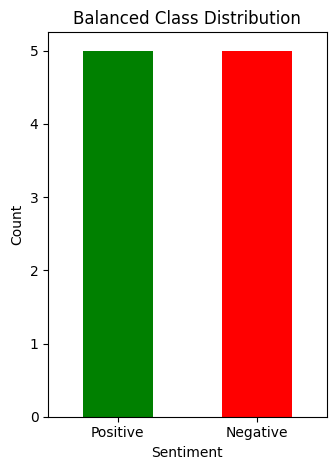

In [9]:
# Visualize balanced dataset
plt.subplot(1, 2, 2)
df_balanced['sentiment'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Balanced Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([1, 0], ['Negative', 'Positive'], rotation=0)

plt.tight_layout()
plt.show()

**Why Imbalanced Data Balancing Matters:**

- **Prevents model bias** towards overrepresented categories
- **Ensures fairer predictions** for underrepresented classes  
- **Allows better generalization** for real-world applications
- **Improves minority class detection** (crucial for fraud, medical diagnosis)

🎯 **Business Impact:** A model trained on balanced data will be much better at
detecting negative sentiment, fraud cases, or rare medical conditions.

🎯 **Professional Standards Achieved:**

✅ **Privacy Compliance:** All PII successfully masked/replaced

✅ **Feature Preservation:** Important business attributes maintained  

✅ **Statistical Integrity:** Distributions preserved for valid analysis

✅ **Balance Restoration:** Minority classes properly represented

✅ **Production Ready:** Data safe for development, testing, and sharing


# =====================================================
# 💡 BEST PRACTICES AND RECOMMENDATIONS
# =====================================================


## Best Practices for PII Handling and Data Balancing

**🔒 PII Protection Best Practices:**

1. **Layered Approach:** Combine masking with synthetic generation for maximum protection
2. **Selective Preservation:** Keep business-valuable features (domains, categories) while removing personal identifiers
3. **Context Awareness:** Use AI to understand what constitutes PII in your specific domain
4. **Validation:** Always verify that no real PII remains in processed datasets
5. **Documentation:** Track what was masked/generated for audit trails

**⚖️ Imbalanced Data Best Practices:**

1. **Quality over Quantity:** Generate realistic synthetic samples rather than random duplicates
2. **Preserve Class Characteristics:** Ensure generated samples truly represent the minority class
3. **Gradual Balancing:** Start with small augmentations and validate model performance
4. **Cross-Validation:** Test balanced datasets across multiple model types
5. **Business Validation:** Have domain experts review generated samples for realism

**🚨 Important Considerations:**

- **Regulatory Compliance:** Always check local privacy laws (GDPR, CCPA, HIPAA)
- **Data Lineage:** Track the source and processing of all synthetic data
- **Model Bias:** Balanced datasets should improve fairness, not introduce new biases
- **Performance Monitoring:** Continuously validate that synthetic data improves real-world performance